[-2.79707814e-06  4.53241310e-06 -2.14736541e-06  2.00359559e-04
 -4.10112758e-08]


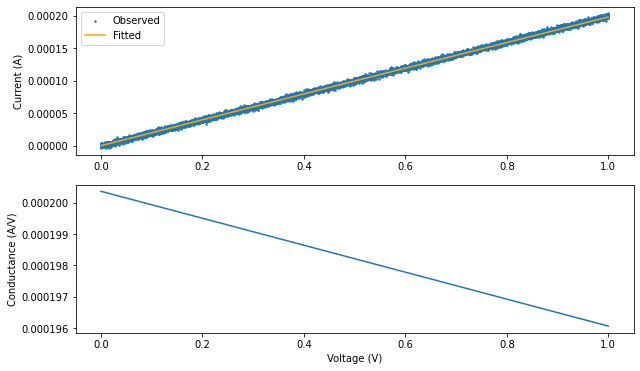

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random as random
from scipy.optimize import curve_fit

# V/R = I
R = 5000 # ohms
voltages = np.linspace(1e-6,1,10000)
currents = voltages/R
currents = np.array([c + random.gauss(0,1e-2)/R for c in currents])



def IV_fit(x, a, b, c, d, f):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + f
p0 = [0,0,0,1/R,0]
p,_ = curve_fit(IV_fit, voltages, currents, p0 = p0)
print(p)

# p = [0,0,0,1/R,0]
p = [0,0,p[2],p[3],0]
outputs = np.polyval(p, voltages)

derivs = np.polyder(p)
deriv_outputs = np.polyval(derivs, voltages)

fig, axs = plt.subplots(2, figsize=(10, 6))
axs[1].set_xlabel("Voltage (V)")
axs[0].scatter(voltages, currents, s=2, label="Observed")
axs[0].plot(voltages, outputs, color='orange', label="Fitted")
plt.grid()
axs[0].legend()
axs[0].set_ylabel("Current (A)")

axs[1].plot(voltages, deriv_outputs)
axs[1].set_ylabel("Conductance (A/V)")
plt.grid()
plt.show()